In [11]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import torch.nn.functional as F
import torch

In [3]:
datapreprocessed=np.load("datasets/moses_test_preprocessed.npy")

In [4]:
datapreprocessed.shape

(176074, 51)

In [5]:
datapreprocessed[0,:]

array([ 5,  5,  5,  5,  5,  5, 12, 20,  5,  7, 12,  5,  7,  3,  5, 19, 12,
       20,  5,  5, 15,  5, 10,  5, 18,  5,  1,  5,  1, 12,  5, 11,  5,  1,
        7,  3,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6])

In [6]:
alphabet={}
for selfie in datapreprocessed:
    for element in selfie:
        if element in alphabet:
            alphabet[element]+=1
        else:
         alphabet[element]=1   


In [7]:
alphabet

{5: 2374669,
 12: 403273,
 20: 102058,
 7: 588545,
 3: 69070,
 19: 393961,
 15: 205765,
 10: 337876,
 18: 221094,
 1: 794226,
 11: 20749,
 6: 2885219,
 22: 123518,
 8: 148539,
 13: 82278,
 0: 54615,
 23: 22642,
 14: 49658,
 4: 8746,
 16: 39484,
 17: 20027,
 2: 26796,
 9: 5895,
 21: 1071}

In [9]:
len(alphabet)

24

In [12]:
tensor=torch.tensor(datapreprocessed[0,:])
one_hot_selfie=F.one_hot(tensor,num_classes=len(alphabet)).float()

In [17]:
torch.set_printoptions(threshold=10_000)
print(tensor)

tensor([ 5,  5,  5,  5,  5,  5, 12, 20,  5,  7, 12,  5,  7,  3,  5, 19, 12, 20,
         5,  5, 15,  5, 10,  5, 18,  5,  1,  5,  1, 12,  5, 11,  5,  1,  7,  3,
         6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6])


In [20]:
ordered_alphabet={}
for i in range(0,24):
    print(i)
    ordered_alphabet[i]=alphabet[i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23


In [21]:
len(ordered_alphabet)

24

In [22]:
weigth=[1.0/ordered_alphabet[i] for i in range(0,24)]

In [23]:
weigth

[1.8309988098507736e-05,
 1.2590874637697582e-06,
 3.731900283624421e-05,
 1.4478065730418417e-05,
 0.0001143379830779785,
 4.211113211988702e-07,
 3.46594140687414e-07,
 1.6991054209958458e-06,
 6.732238671325376e-06,
 0.00016963528413910093,
 2.9596656761652204e-06,
 4.8195093739457326e-05,
 2.479709774767961e-06,
 1.2153917207515983e-05,
 2.013774215634943e-05,
 4.859913007557165e-06,
 2.532671461857968e-05,
 4.99325910021471e-05,
 4.522963083575312e-06,
 2.5383223212449965e-06,
 9.798349957867095e-06,
 0.0009337068160597573,
 8.095986010136174e-06,
 4.416570974295557e-05]

In [25]:
centered=[element/sum(weigth) for element in weigth]

In [28]:
centered

[0.011940684325383009,
 0.0008211018959726741,
 0.024337232214912415,
 0.009441732654275272,
 0.07456442652993289,
 0.0002746237367948093,
 0.0002260280673428232,
 0.0011080554153561632,
 0.004390365321099462,
 0.11062603467867567,
 0.0019301177782109207,
 0.031429971296486246,
 0.0016171191089678532,
 0.007926061333902053,
 0.0131326367238067,
 0.0031693459744407118,
 0.016516575687133855,
 0.03256306358569896,
 0.002949607291155767,
 0.001655342722834984,
 0.006389900590162388,
 0.6089080060044754,
 0.005279720157635268,
 0.028802246905343745]

In [43]:
al =["[Branch1_1]", "[Branch1_2]", "[Branch1_3]", "[Ring1]", "[Branch2_1]", "[Branch2_2]", "[Branch2_3]", "[Ring2]", "[Branch3_1]", "[Branch3_2]", "[Branch3_3]", "[Ring3]", "[O]", "[=O]", "[N]", "[=N]", "[C]", "[=C]", "[#C]", "[S]", "[=S]", "[P]", "[F]", "[C@Hexpl]", "[C@@Hexpl]", "[C@expl]", "[C@@expl]", "[H]", "[NHexpl]", "[epsilon]", "[Cl]", "[#N]", "[Br]"]

In [45]:
al = dict(zip(al, [0]*len(al) ))

In [35]:
a = pd.read_csv("data/moses_train.csv")

In [38]:
lengths = a.selfies.apply(lambda x : x.count('['))

In [39]:
lengths.min()

13

In [41]:
lengths.max()

54

In [42]:
lengths.apply(lambda x: 54-x).sum()

31524501

In [36]:
a.selfies[0]

'[C][C][C][S][Branch1_3][epsilon][=O][C][=C][C][=C][NHexpl][C][Branch1_3][Branch2_1][=N][C][Branch1_3][epsilon][=O][O][C][NHexpl][C][Ring1][Branch2_2][=C][Ring1][=O]'

In [46]:
for i in tqdm(range(len(a))):
    for element in [i+']' for i in a.selfies[i].split("]")[:-1]]:
        al[element] += 1

In [47]:
al['PADDING'] = 31524501

In [51]:
out =np.array(list(al.values()), dtype=float)

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
al.keys()

dict_keys(['[Branch1_1]', '[Branch1_2]', '[Branch1_3]', '[Ring1]', '[Branch2_1]', '[Branch2_2]', '[Branch2_3]', '[Ring2]', '[Branch3_1]', '[Branch3_2]', '[Branch3_3]', '[Ring3]', '[O]', '[=O]', '[N]', '[=N]', '[C]', '[=C]', '[#C]', '[S]', '[=S]', '[P]', '[F]', '[C@Hexpl]', '[C@@Hexpl]', '[C@expl]', '[C@@expl]', '[H]', '[NHexpl]', '[epsilon]', '[Cl]', '[#N]', '[Br]'])

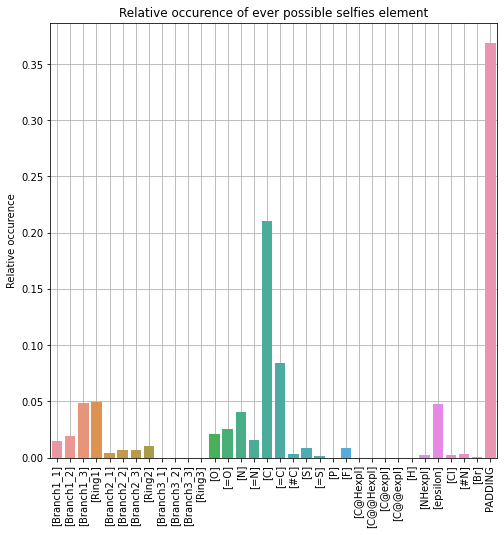

In [50]:
f,ax = plt.subplots(1,1,figsize=(8,8))

sns.barplot(y=np.array(list(al.values()))/sum(np.array(list(al.values()))),x=list(al.keys()))
plt.xticks(rotation = 90)
plt.ylabel("Relative occurence")
ax.set_axisbelow(True)
plt.grid()
plt.title("Relative occurence of ever possible selfies element")
pass

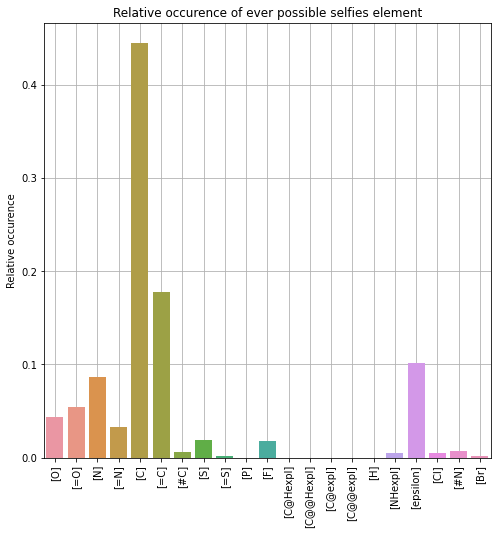

In [71]:
f,ax = plt.subplots(1,1,figsize=(8,8))

sns.barplot(y=np.array(list(al.values())[12:])/sum(np.array(list(al.values())[12:])),x=list(al.keys())[12:])
plt.xticks(rotation = 90)
plt.ylabel("Relative occurence")
ax.set_axisbelow(True)
plt.grid()
plt.title("Relative occurence of ever possible selfies element")
pass

In [52]:
for i in range(len(out)):
    if(out[i] != 0):
        out[i] = 1.0/out[i]

In [53]:
out /= sum(out)

In [54]:
out

array([0.01217708, 0.00948469, 0.00377783, 0.00370055, 0.04868181,
       0.02715935, 0.02685141, 0.01828003, 0.        , 0.        ,
       0.        , 0.        , 0.00883069, 0.00717266, 0.00446925,
       0.01183266, 0.0008677 , 0.00217616, 0.06201966, 0.0210205 ,
       0.18292837, 0.        , 0.02212551, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.08719869, 0.00380422,
       0.08321414, 0.05577309, 0.2959594 , 0.00049454])

In [3]:
from dataloaders.molDataset_simplified import molDataset, Loader

Using backend: pytorch


In [5]:
loaders = Loader(maps_path='map_files/',
                    csv_path="data/moses_train.csv",
                    vocab="selfies",
                    build_alphabet=False,
                    alphabet_name = "moses_alphabets.json", 
                    n_mols=-1,
                    num_workers=1,
                    batch_size=64)
                #  props=properties,
                #  targets=targets)

train_loader, _, test_loader = loaders.get_data()

Dataset columns: Index(['Unnamed: 0', 'smiles', 'selfies'], dtype='object')
> Loaded edge and atoms types to one-hot mappings
-> Careful : Using PREDEFINED selfies alphabet : moses_alphabets.json
> Loaded alphabet. Using selfies. Max sequence length allowed is 54


In [5]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='6'

In [6]:
from tqdm.notebook import tqdm
import dgl

In [21]:
for i, (graph, smile) in tqdm(enumerate(train_loader), total = len(train_loader)):
    s = smile
    save_graphs("data/batched_dataset/{}.bin".format(i),dgl.unbatch(graph))
    if(i==10):
        break

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3c461dd0>
Traceback (most recent call last):
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 942, in _shutdown_workers
    w.join()
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/multiprocessing/process.py", line 138, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f6d3c461dd0>
Traceback (most recent call last):
  File "/home/mcb/users/achol1/.conda/envs/optimol2/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 962, in __del__
    self._shutdown_workers()
  File "/home/mcb/users/achol1/.

KeyboardInterrupt: 

In [34]:
import sys

In [35]:
sys.getsizeof(g)

920

In [7]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [8]:
device

'cuda'

In [2]:
from dgl.data.utils import save_graphs

Using backend: pytorch


In [3]:
from dgl.data.utils import load_graphs

In [23]:
for _ in range(100):
    load_graphs("data/onebatch.bin")

In [21]:
save_graphs("data/onebatch.bin",dgl.unbatch(g[0]))

In [19]:
g[0].__dict__

{'_graph': <dgl.graph_index.GraphIndex at 0x7f5b144facd0>,
 '_node_frame': <dgl.frame.FrameRef at 0x7f5b144f9d50>,
 '_edge_frame': <dgl.frame.FrameRef at 0x7f5b145045d0>,
 '_msg_index': None,
 '_msg_frame': <dgl.frame.FrameRef at 0x7f5b145048d0>,
 '_message_func': None,
 '_reduce_func': None,
 '_apply_node_func': None,
 '_apply_edge_func': None,
 '_batch_num_nodes': [25,
  18,
  20,
  23,
  20,
  24,
  23,
  19,
  22,
  23,
  22,
  18,
  19,
  18,
  22,
  15,
  21,
  20,
  17,
  19,
  21,
  19,
  23,
  25,
  23,
  24,
  20,
  25,
  19,
  21,
  20,
  24,
  24,
  18,
  20,
  23,
  25,
  25,
  21,
  21,
  23,
  22,
  24,
  17,
  22,
  20,
  25,
  22,
  21,
  20,
  20,
  21,
  22,
  25,
  24,
  23,
  25,
  21,
  25,
  23,
  24,
  24,
  17,
  23],
 '_batch_num_edges': [54,
  40,
  42,
  50,
  44,
  50,
  50,
  38,
  48,
  50,
  48,
  38,
  38,
  38,
  50,
  30,
  44,
  42,
  34,
  42,
  44,
  40,
  50,
  54,
  48,
  52,
  42,
  52,
  40,
  44,
  42,
  50,
  50,
  36,
  42,
  50,
  54,
  54,

In [15]:
save_graphs("data/100graphs.bin", g[0])

AssertionError: Batched DGLGraph is not supported for serialization

In [9]:
from dgl_utils import send_graph_to_device

In [10]:
for i in range(len(g)):
    send_graph_to_device(g[i], device)

In [15]:
s[0]

tensor([16, 12, 16,  2, 29, 13, 16, 16, 16, 19,  0, 29, 13,  2, 29, 13, 14, 16,
        16,  2, 29, 16, 16, 16,  2, 29, 16, 16,  3,  2, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29])

In [16]:
from rdkit import Chem

In [22]:
from selfies import decoder, encoder

In [24]:
srg = ""
for c in s[0]:
    srg +=  al[c]

In [25]:
al

['[Branch1_1]',
 '[Branch1_2]',
 '[Branch1_3]',
 '[Ring1]',
 '[Branch2_1]',
 '[Branch2_2]',
 '[Branch2_3]',
 '[Ring2]',
 '[Branch3_1]',
 '[Branch3_2]',
 '[Branch3_3]',
 '[Ring3]',
 '[O]',
 '[=O]',
 '[N]',
 '[=N]',
 '[C]',
 '[=C]',
 '[#C]',
 '[S]',
 '[=S]',
 '[P]',
 '[F]',
 '[C@Hexpl]',
 '[C@@Hexpl]',
 '[C@expl]',
 '[C@@expl]',
 '[H]',
 '[NHexpl]',
 '[epsilon]',
 '[Cl]',
 '[#N]',
 '[Br]']

In [30]:
m = "[C][O][C][Branch1_3][epsilon][=O][C][C][C][S][Branch1_1][epsilon][=O][Branch1_3][epsilon][=O][N][C][C][Branch1_3][epsilon][C][C][C][Branch1_3][epsilon][C][C][Ring1][Branch1_3][oioi][oioi]"
m.replace('[oioi]','')

'[C][O][C][Branch1_3][epsilon][=O][C][C][C][S][Branch1_1][epsilon][=O][Branch1_3][epsilon][=O][N][C][C][Branch1_3][epsilon][C][C][C][Branch1_3][epsilon][C][C][Ring1][Branch1_3]'

In [29]:
decoder("[C][O][C][Branch1_3][epsilon][=O][C][C][C][S][Branch1_1][epsilon][=O][Branch1_3][epsilon][=O][N][C][C][Branch1_3][epsilon][C][C][C][Branch1_3][epsilon][C][C][Ring1][Branch1_3][oioi][oioi]")

'COC(=O)CCCS(=O)(=O)N1CC(C)CC(C)C1[oioi][oioi]'

In [ ]:
Chem.MolFromSmiles()